### Week 5 Homework Solution

##### Question 1. Install Spark and PySpark - Display Spark Version


In [1]:
# Spark, PySpark installed
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName('test') \
    .getOrCreate()


22/03/01 09:19:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
# Spark version (surprisingly __version__ is not defined!!)
spark.version

'3.0.3'

##### Answer: 
`
'3.0.3'
`

##### Question 2. HVFHW February 2021

In [2]:
# Download FHVHV 2021 - 02 Data
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhvhv_tripdata_2021-02.csv

--2022-02-27 13:16:01--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhvhv_tripdata_2021-02.csv
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 52.216.176.67
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|52.216.176.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 733822658 (700M) [text/csv]
Saving to: ‘fhvhv_tripdata_2021-02.csv’

fhvhv_tripdata_2021 100%[===================>] 699.83M  92.6MB/s    in 8.6s    

2022-02-27 13:16:10 (81.0 MB/s) - ‘fhvhv_tripdata_2021-02.csv’ saved [733822658/733822658]



In [3]:
# Record count - 11,613,943 
!wc -l fhvhv_tripdata_2021-02.csv

11613943 fhvhv_tripdata_2021-02.csv


In [4]:
# Get 1000 records
!head -n 1001 fhvhv_tripdata_2021-02.csv > head.csv

In [4]:
!wc -l head.csv

1001 head.csv


In [5]:
# Load small data set to pandas for analyzing and looking at schema
import pandas as pd

df_pandas = pd.read_csv('head.csv')

In [11]:
df_pandas.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
0,HV0003,B02764,2021-02-01 00:10:40,2021-02-01 00:21:09,35,39,NaN
1,HV0003,B02764,2021-02-01 00:27:23,2021-02-01 00:44:01,39,35,NaN
2,HV0005,B02510,2021-02-01 00:28:38,2021-02-01 00:38:27,39,91,NaN
3,HV0005,B02510,2021-02-01 00:43:37,2021-02-01 01:23:20,91,228,NaN
4,HV0003,B02872,2021-02-01 00:08:42,2021-02-01 00:17:57,126,250,NaN


In [6]:
df_pandas.dtypes

hvfhs_license_num        object
dispatching_base_num     object
pickup_datetime          object
dropoff_datetime         object
PULocationID              int64
DOLocationID              int64
SR_Flag                 float64
dtype: object

In [9]:
# Load into spark and see what dataframe schema would Spark create
spark.createDataFrame(df_pandas).printSchema()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- SR_Flag: double (nullable = true)



In [12]:
from pyspark.sql import types

In [14]:
# Define an updated scheme to use during Spark dataload
schema = types.StructType([
    types.StructField('hvfhs_license_num', types.StringType(), True),
    types.StructField('dispatching_base_num', types.StringType(), True),
    types.StructField('pickup_datetime', types.TimestampType(), True),
    types.StructField('dropoff_datetime', types.TimestampType(), True),
    types.StructField('PULocationID', types.IntegerType(), True),
    types.StructField('DOLocationID', types.IntegerType(), True),
    types.StructField('SR_Flag', types.StringType(), True)
])

In [15]:
# Read FHVHV trip data for 2021 02
df = spark.read \
    .option("header", "true") \
    .schema(schema) \
    .csv('fhvhv_tripdata_2021-02.csv')

In [16]:
# Create 24 partitions
df = df.repartition(24)

In [17]:
# Save it to parquet file
df.write.parquet('fhvhv/2021/02/')

In [4]:
# read and print schema - done
df = spark.read.parquet('fhvhv/2021/02/')
df.printSchema()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- SR_Flag: string (nullable = true)



##### Answer: 210M 
`
(base) shivamantri@dezc-linux-instance:~/notebooks/code/fhvhv/2021$ du -h 02
210M    02
`

In [2]:
from pyspark.sql import functions as F

In [5]:
df.show()

+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+
|hvfhs_license_num|dispatching_base_num|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|SR_Flag|
+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+
|           HV0003|              B02887|2021-02-06 01:18:35|2021-02-06 01:40:34|         163|         235|   null|
|           HV0005|              B02510|2021-02-05 07:13:06|2021-02-05 07:31:56|         225|         181|   null|
|           HV0003|              B02869|2021-02-04 16:56:52|2021-02-04 17:21:36|         260|          95|   null|
|           HV0003|              B02871|2021-02-03 18:34:17|2021-02-03 18:57:12|         235|          60|   null|
|           HV0003|              B02869|2021-02-04 07:25:09|2021-02-04 07:30:34|          55|          55|   null|
|           HV0003|              B02836|2021-02-04 23:15:27|2021-02-04 23:34:29|

In [10]:
# Register temporary table
df.registerTempTable('fhvhv_data')

##### Question 3. Count records
How many taxi trips were there on February 15?

In [12]:
df_result = spark.sql ("""
SELECT
    count(*)
FROM
    fhvhv_data
WHERE
    pickup_datetime >= '2021-02-15 00:00:00' and
    pickup_datetime < '2021-02-16 00:00:00'
""").show()

+--------+
|count(1)|
+--------+
|  367170|
+--------+



##### Answer: 
`
367,170
`

##### Question 4. Longest trip for each day
Now calculate the duration for each trip.
Trip starting on which day was the longest?

In [36]:
df_result = spark.sql ("""
SELECT rollup.PUDate, max(rollup.duration)
FROM (
    SELECT
        DATE(pickup_datetime) as PUDate, 
        pickup_datetime, dropoff_datetime, 
        (UNIX_TIMESTAMP(dropoff_datetime) - UNIX_TIMESTAMP(pickup_datetime)) as duration
    FROM
        fhvhv_data
--    WHERE
--        pickup_datetime <= '2021-02-10 00:00:00'
    ) rollup
GROUP BY rollup.PUDate
ORDER BY 2 DESC
LIMIT 1
""").show()

+----------+-------------+
|    PUDate|max(duration)|
+----------+-------------+
|2021-02-11|        75540|
+----------+-------------+



##### Answer
`
+----------+-------------+
|    PUDate|max(duration)|
+----------+-------------+
|2021-02-11|        75540|
+----------+-------------+
`

##### Question 5. Most frequent dispatching_base_num
Now find the most frequently occurring dispatching_base_num in this dataset.
How many stages this spark job has?
Note: the answer may depend on how you write the query, so there are multiple correct answers. Select the one you have.

In [39]:
df_result = spark.sql ("""
SELECT
    dispatching_base_num, 
    count(*)
FROM
    fhvhv_data
GROUP BY dispatching_base_num
ORDER BY 2 DESC
LIMIT 10
""").show()

+--------------------+--------+
|dispatching_base_num|count(1)|
+--------------------+--------+
|              B02510| 3233664|
|              B02764|  965568|
|              B02872|  882689|
|              B02875|  685390|
|              B02765|  559768|
|              B02869|  429720|
|              B02887|  322331|
|              B02871|  312364|
|              B02864|  311603|
|              B02866|  311089|
+--------------------+--------+



##### Answer
`
3 Stages
`
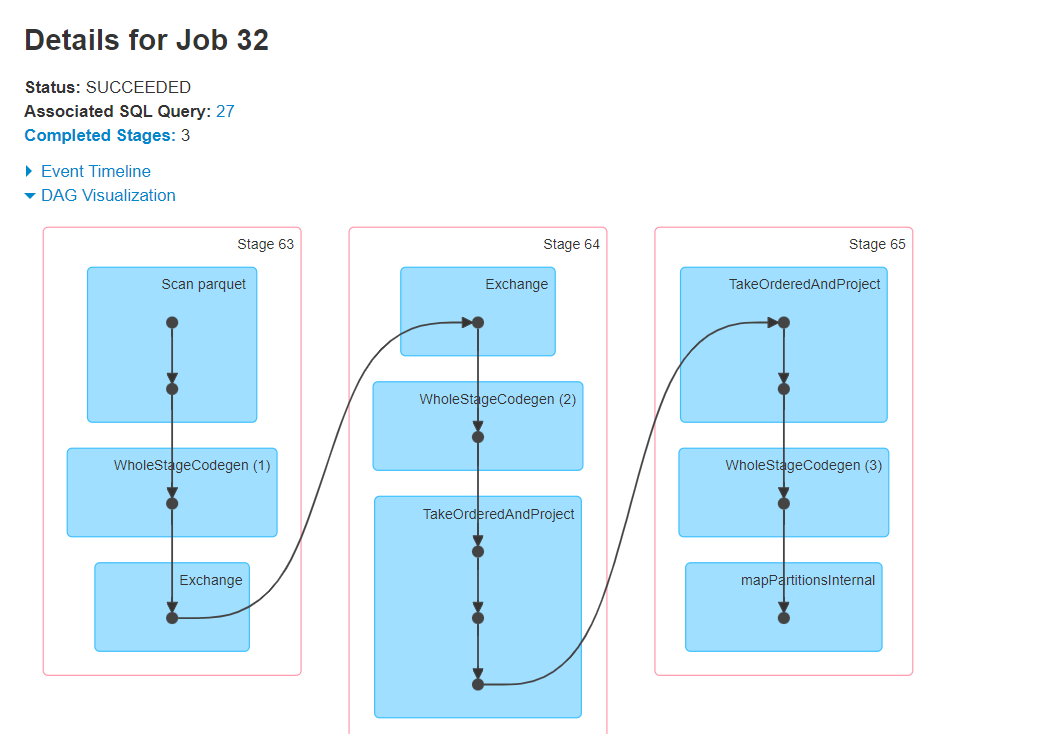

##### Question 6. Most common locations pair
Find the most common pickup-dropoff pair.

For example:
"Jamaica Bay / Clinton East"

Enter two zone names separated by a slash
If any of the zone names are unknown (missing), use "Unknown". For example, "Unknown / Clinton East".

In [43]:
# Load Zones Files
df_zone = spark.read.parquet('zones/')

df.printSchema()
df_zone.printSchema()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- SR_Flag: string (nullable = true)

root
 |-- LocationID: string (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zone: string (nullable = true)



In [69]:
# Define Function to handle empty or null PU/DO Location IDs
def unknownFunction(colVal):
    if not colVal:
        return 'Unknown'
    elif colVal == 'NA':
        return 'Unknown'
    else:
        return colVal
    
unknownFunction('A')

'A'

In [73]:
# Join FHVHV and Zones - Full Outerjoin

## For Pick Up
df_pu_result = df.join(df_zone, (df.PULocationID == df_zone.LocationID))

# Update result to include appropriate columns and rename accordingly
df_pu_result = df_pu_result.drop('LocationID', 'SR_Flag', 'hvfhs_license_num', 'service_zone', 'Borough')\
    .withColumnRenamed('Zone', 'PU_Zone')

## For Drop Off
df_do_result = df_pu_result.join(df_zone, (df_pu_result.DOLocationID == df_zone.LocationID))

# Update result to include appropriate columns and rename accordingly
df_do_result = df_do_result.drop('dispatching_base_num', 'LocationID', 'SR_Flag', 'hvfhs_license_num', 'service_zone', 'Borough')\
    .withColumnRenamed('Zone', 'DO_Zone')

## Got the results

## Concat PU and DO Zones
df_zonepair = df_do_result.withColumn('zone_pair', 
                  F.concat(F.col('PU_Zone'),F.lit('/'), F.col('DO_Zone'))) \
    .drop('PU_Zone', 'DO_Zone')

## Now register table and do rest in SQL
df_zonepair.registerTempTable('zone_pair')   

In [79]:
## Group By Zone Pair, Count and Limit to 1
df_zonepair_result = spark.sql("""
SELECT
    zone_pair, count(*)
FROM
    zone_pair
GROUP BY
    zone_pair
ORDER BY
    2 DESC
LIMIT 1
""")

df_zonepair_result.show(2, False)

+---------------------------+--------+
|zone_pair                  |count(1)|
+---------------------------+--------+
|East New York/East New York|45041   |
+---------------------------+--------+



##### Answer: East New York/East New York
`
+---------------------------+--------+
|zone_pair                  |count(1)|
+---------------------------+--------+
|East New York/East New York|45041   |
+---------------------------+--------+
`